<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/2022_day_3/blob/main/for_students_RNN_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Import libraries
"""

import pandas as pd # data manipulation
import numpy as np

# plot data
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# to develop the nn
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential

import datetime, os # for tensorBoard

# check performance
from sklearn.metrics import r2_score

Examine the Open Power System Data (OPSD) for Germany.

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017.

- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh

In [ ]:
"""
Load the data
"""

# load dataset
L='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
timeSeriesDF = pd.read_csv(L, 
                             sep=',', 
                             index_col=0,
                             parse_dates=[0]) 

Text(0, 0.5, 'Daily Totals (GWh)')

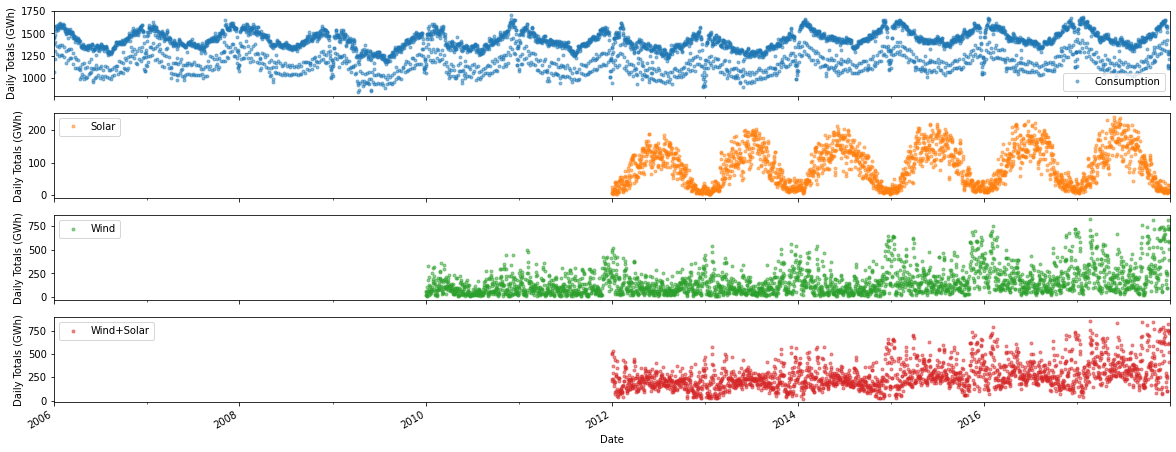

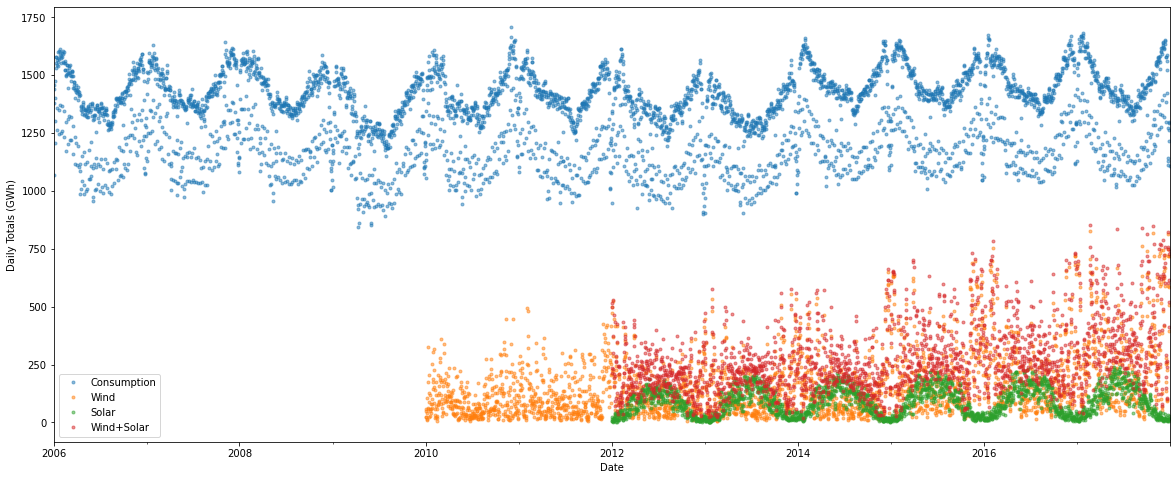

In [ ]:
"""
Plot the data
"""

# plot the time series data in different plots
categories = ['Consumption', 'Solar', 'Wind', 'Wind+Solar']
mpl.rcParams['figure.figsize'] = (20, 8)
axes = timeSeriesDF[categories].plot(marker='.', 
                                      alpha=0.5, 
                                      linestyle='None', 
                                      subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)') # add the y axes label
    
# plot the time series data in the same plot
axes = timeSeriesDF.plot(marker='.', 
                           alpha=0.5, 
                           linestyle='None')
plt.ylabel('Daily Totals (GWh)')

In [ ]:
"""
Produce the data with time steps
"""

# split the time series into samples with time steps
def produceSequence(timeSeries, rnnInputTimeSteps, rnnOutputTimeSteps):
	data, label = list(), list()
	for t in range(len(timeSeries)):
		# find the end of the time series
		inputLenght = t + rnnInputTimeSteps
		outputLenght = inputLenght + rnnOutputTimeSteps
		# check if the time steps data are going beyond the signal length
		if outputLenght > len(timeSeries):
			break
		# produce the data with time steps and the label
		dataSequence, labelSequence = timeSeries[t:inputLenght], timeSeries[inputLenght:outputLenght]
		data.append(dataSequence)
		label.append(labelSequence)
	return np.array(data), np.array(label)

In [ ]:
"""
Create the train and test data
"""

rnnInputTimeSteps = 33 # number of days to examine
rnnOutputTimeSteps = 1 # how many days in sequence to forcast

# fix the seed to replicate the results


# evaluate the power consumption



# prduce the datasets



# reshape from [samples, timesteps] to [samples, timesteps, features]
numberFeatures = 1 # evaluate one energy measurement each day
X = X.reshape((X.shape[0], X.shape[1], numberFeatures))

# use the last year to test and the rest of the data to train
xTrain = X[:-365] # all data exept last year (365 days)
yTrain = Y[:-365]
xTest = X[-365:] # only last year
yTest = Y[-365:]

# check the datasets shape
xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

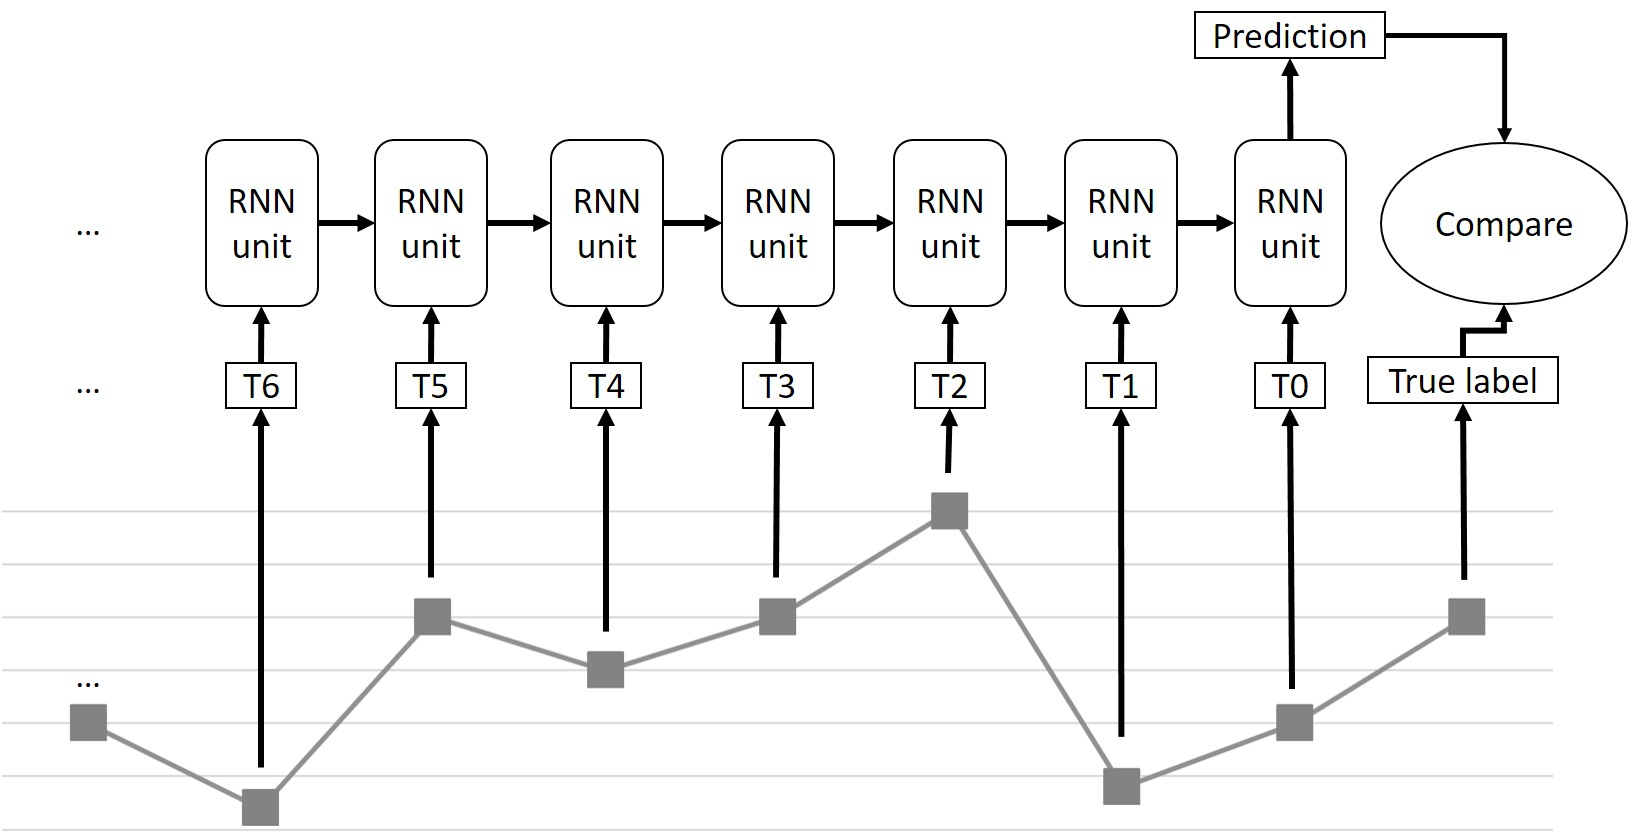

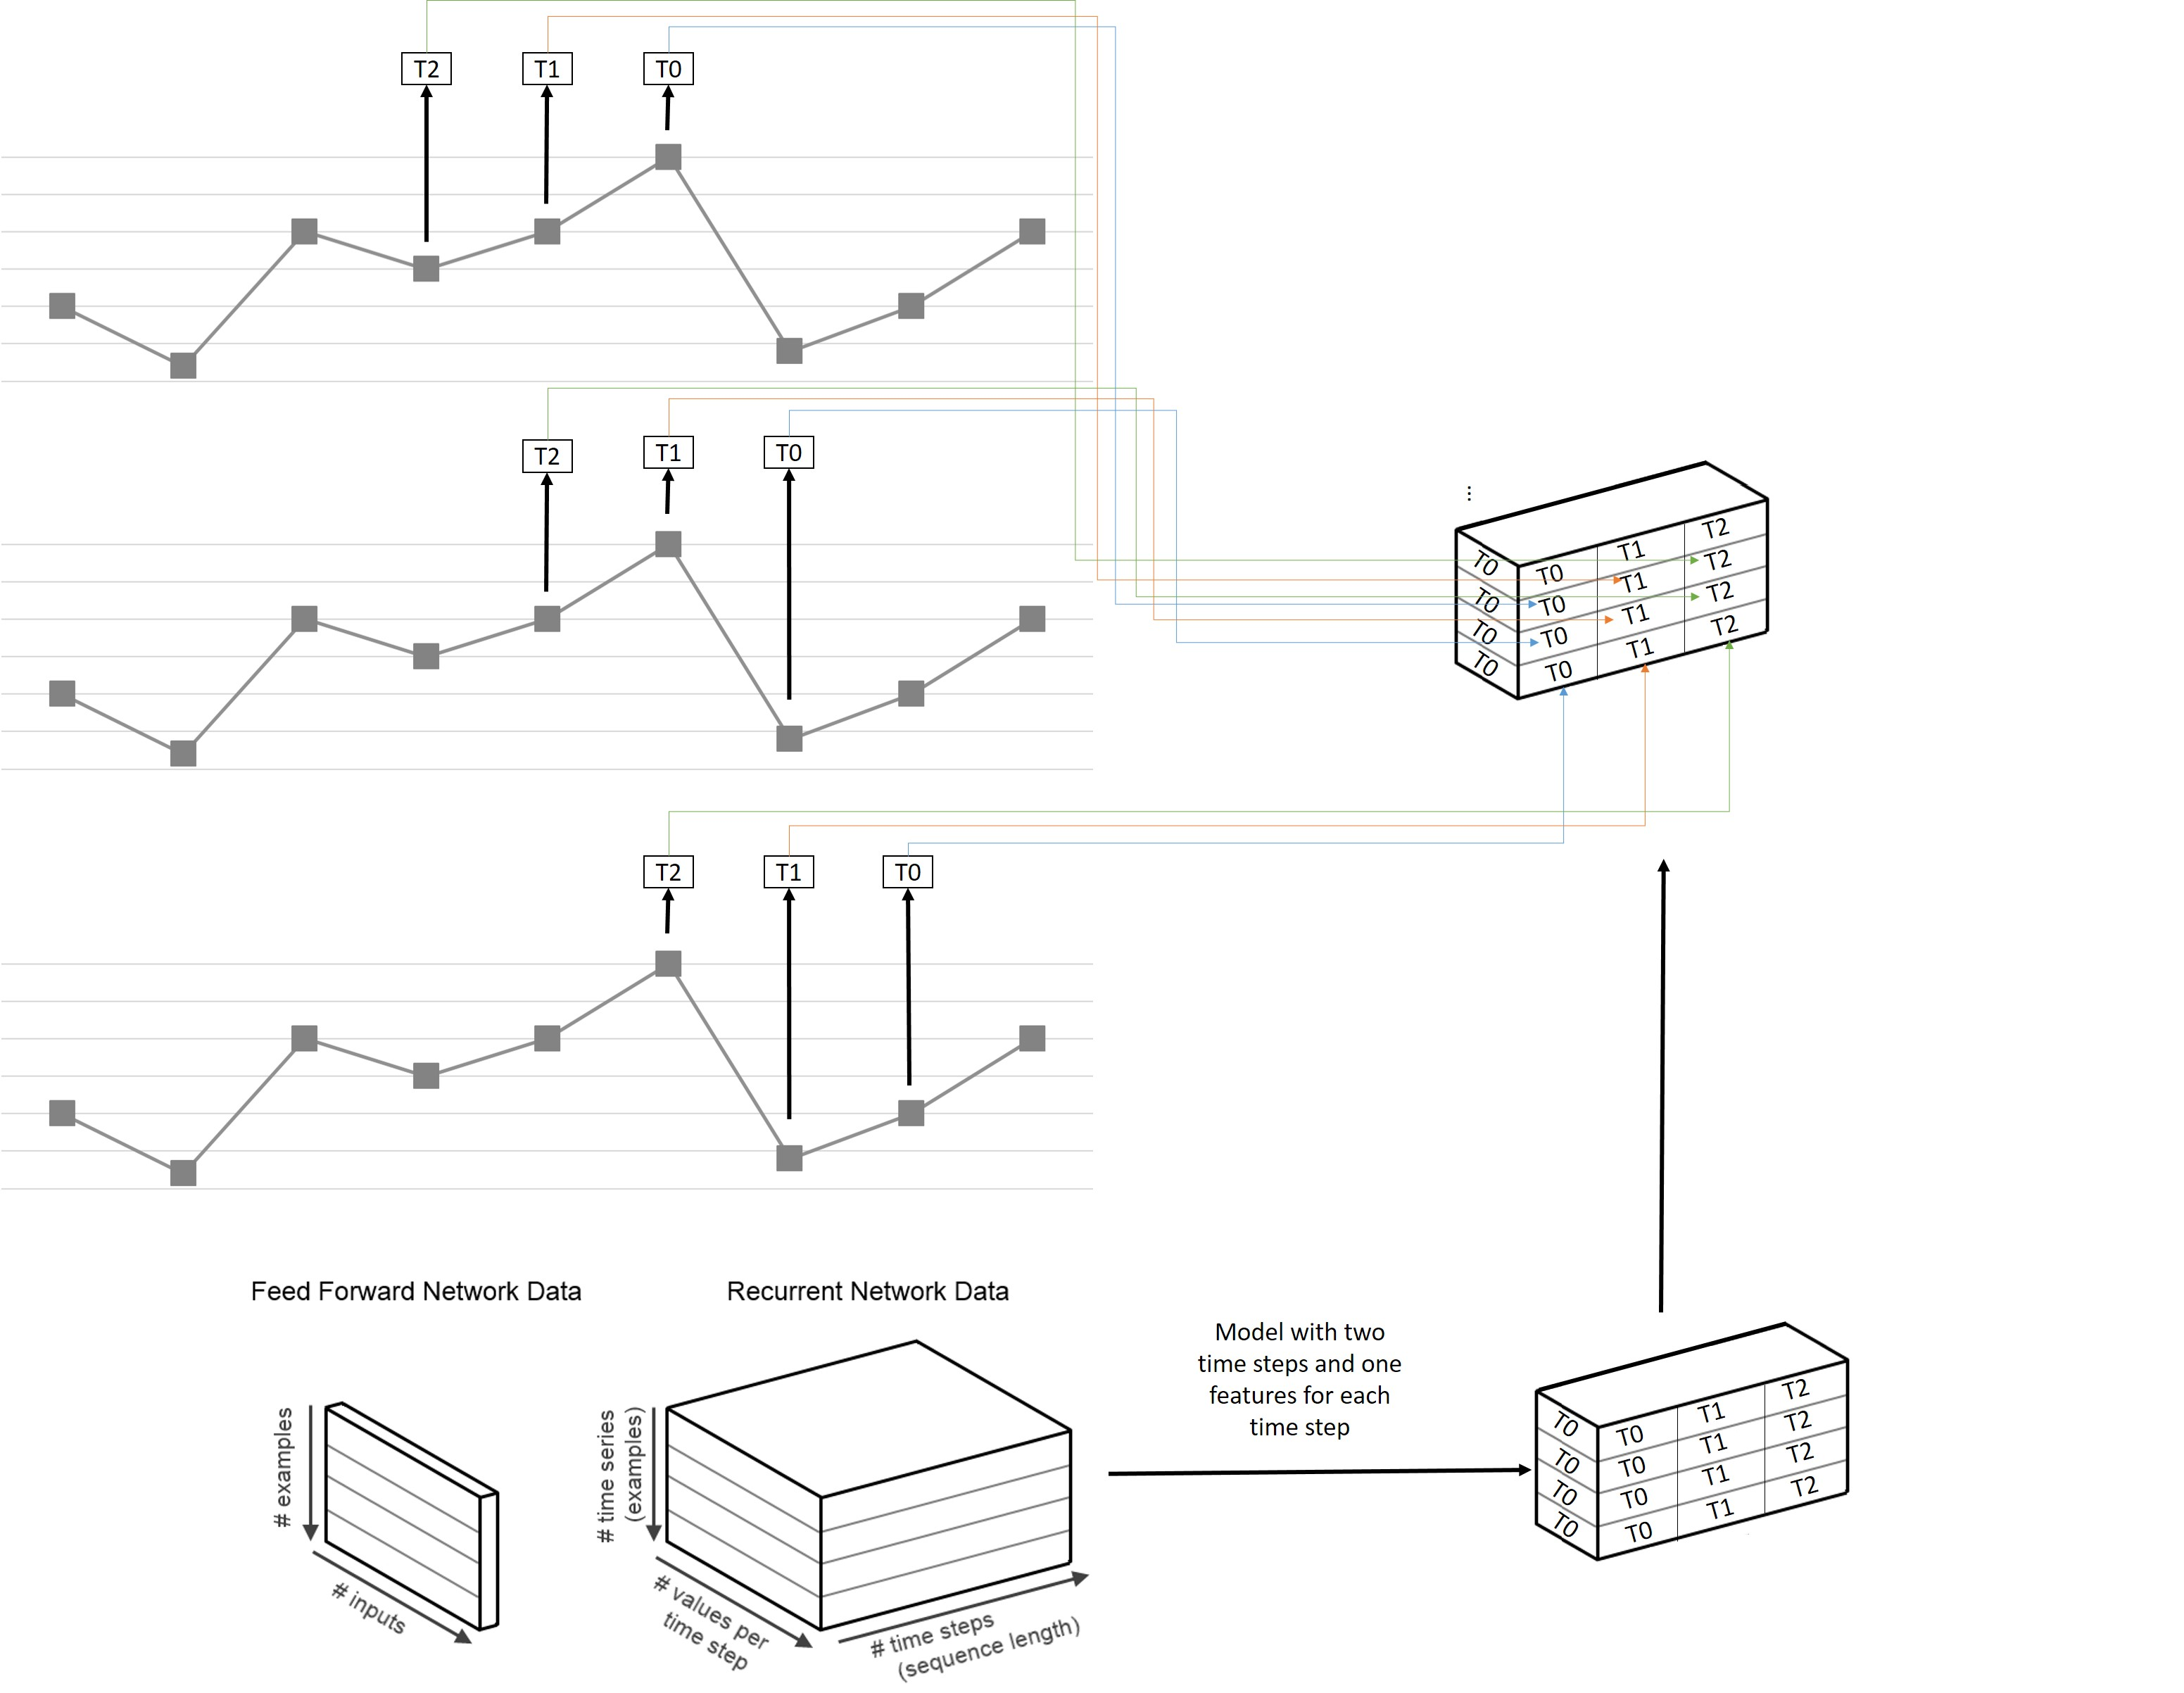

In [ ]:
"""
Define the custom performance metric
"""

# R^2 (coefficient of determination) regression score
def r2Error(y_true, y_pred):
  # unexplainedError = sum((true - predicted)^2)
  unexplainedError = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
  # totalError = sum((true - mean(true))^2)
  totalError = tf.reduce_sum(tf.square(tf.subtract(y_true, 
                                                    tf.reduce_mean(y_true))))
  # R2score = 1 - (unexplainedError / totalError)
  R2score = tf.subtract(1.0, tf.divide(unexplainedError, totalError))
  return R2score

In [ ]:
"""
Define the nn as a RNN
"""

# specify the model


# compile the model


# check the model


In [ ]:
"""
Train the model 
"""

# callbacks for tensorBoard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# specify training characterustics
batchSize = 32
epochs = 30

# train the model


# check caracteristics of the trained model
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
"""
Check the performance of the model
"""



In [ ]:
"""
Plot the forcasts for the power consumptions agaist the true vales
"""

plt.plot(consumption[-365::1], alpha=0.5, color='g')
plt.plot(prediction[::1], color='r', ls='dashed')
mpl.rcParams['figure.figsize'] = (30, 8)
plt.title('Test data, 2017')
plt.ylabel('Daily Totals (GWh)')
plt.xlabel('Day')
plt.legend(["True", "Predicted"], bbox_to_anchor=(0.75, 1.15), ncol=2)